In [1]:
import numpy as np
from numpy import array
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('science')
from mpl2latex import mpl2latex, latex_figsize
mpl2latex()
from matplotlib.lines import Line2D

### Plot settings

In [2]:
colorr = '#FF2C00'
colorb = '#0C5DA5'
colorg = '#00B945'
msize = 5

In [3]:
def adjust_lightness(color, amount=0.5):
    '''
    Lightens/darkens a mpl color
    '''
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])

### Jensen and Krylov benchmark

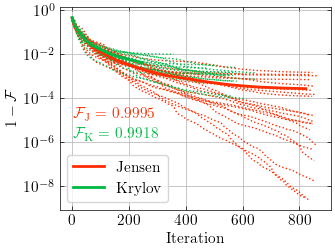

In [4]:
nruns = 20
x1 = pd.read_csv('comparison/jensen{}.csv'.format(1), sep='\t')
x2 = pd.read_csv('comparison/krylov{}.csv'.format(1), sep='\t')
plt.plot(x1, color=colorr, linestyle='dotted')
plt.plot(x2, color=colorg, linestyle='dotted')
jmin = len(array(x1))
kmin = len(array(x1))

for ii in range(2,nruns+1):
    x1 = pd.read_csv('comparison/jensen{}.csv'.format(ii), sep='\t')
    x2 = pd.read_csv('comparison/krylov{}.csv'.format(ii), sep='\t')
    if len(array(x1)) < jmin:
        jmin = len(array(x1))
    if len(array(x2)) < kmin:
        kmin = len(array(x2))
    plt.plot(x1, color=colorr, linestyle='dotted')
    plt.plot(x2, color=colorg, linestyle='dotted')

x1avg, x2avg = 0., 0.
for ii in range(1,nruns+1):
    x1 = pd.read_csv('comparison/jensen{}.csv'.format(ii), sep='\t')
    x2 = pd.read_csv('comparison/krylov{}.csv'.format(ii), sep='\t')
    x1avg += array(x1)[:jmin]
    x2avg += array(x2)[:kmin]

x1avg = x1avg/nruns
x2avg = x2avg/nruns

plt.plot(x1avg, color=colorr, linewidth=2, label='Jensen')
plt.plot(x2avg, color=colorg, linewidth=2, label='Krylov')
plt.annotate('$\mathcal{F}_{\mathrm{J}}=$ '+str(np.round(1-x1avg[-1][0]*2,4)), color=colorr, xy=(0.05, 0.45), xycoords='axes fraction')
plt.annotate('$\mathcal{F}_{\mathrm{K}}=$ '+str(np.round(1-x2avg[-1][0]*2,4)), color=colorg, xy=(0.05, 0.35), xycoords='axes fraction')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$1-\mathcal{F}$')
plt.legend(loc='lower left', frameon=True)
plt.minorticks_off()
plt.grid(True)
plt.savefig('plots/JK.pdf')
plt.show()

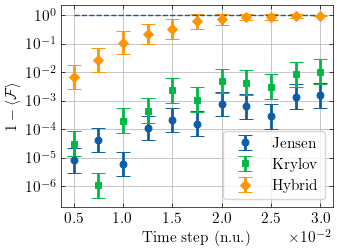

In [5]:
names = ['dt', 'jj', 'sigjj', 'kk', 'sigkk', 'jk', 'sigjk']
comp = pd.read_csv('scaling/comparison.dat', sep='\t', names=names)

data = lambda x: np.log10(1-x)
err = lambda x,y: (1/np.log(10))*(x/1+y)

plt.errorbar(comp['dt'], data(comp['jj']), yerr=err(comp['sigjj'], comp['jj']), fmt='o', elinewidth=2, markersize=msize, mew=0.7, capsize=msize, label='Jensen')
plt.errorbar(comp['dt'], data(comp['kk']), yerr=err(comp['sigkk'], comp['kk']), fmt='s', elinewidth=2, markersize=msize, mew=0.7, capsize=msize, label='Krylov')
plt.errorbar(comp['dt'], data(comp['jk']), yerr=err(comp['sigjk'], comp['jk']), fmt='D', elinewidth=2, markersize=msize, mew=0.7, capsize=msize, label='Hybrid')
plt.hlines(0, .005, 0.030, linestyle='dashed')

plt.xticks(1e-3*np.array([5,10,15,20,25,30]))
plt.yticks(np.arange(-6,1), ['$10^{-6}$', '$10^{-5}$', '$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^0$'])
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.minorticks_off()

plt.xlabel('Time step $(\mathrm{n.u.})$')
plt.ylabel('$1-\langle\mathcal{F}\\rangle$')
plt.legend(ncol=1, loc='lower right', frameon=True)
plt.grid(True)
plt.savefig('plots/hybrid.pdf')
plt.show()

### Authomatic differentiation

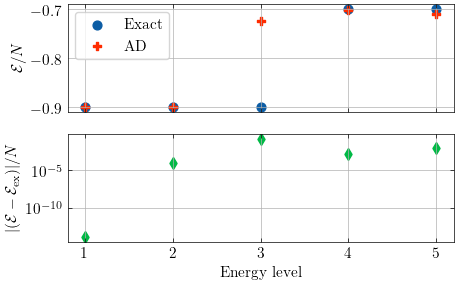

In [6]:
energies = array([-0.8999999999999865, -0.8998945383658403, -0.7232697081164905, -0.7015859044982035, -0.7097496508609293])
ex_energies = array([-0.9, -0.9, -0.9, -0.7000000000000002, -0.7])

figure, axis = plt.subplots(2, 1, sharex=True, figsize=latex_figsize(wf=1))
x = np.arange(1,len(energies)+1,1)

axis[0].scatter(x,ex_energies, s=40, label='Exact', color=colorb)
axis[0].scatter(x, energies, marker='P', s=30, label='AD', color=colorr)
axis[0].tick_params(left=False, right=False)
axis[0].set_ylabel('$\mathcal{E}/N$')
axis[0].legend(frameon=True, loc='upper left')
axis[0].grid(True)
axis[0].minorticks_off()

axis[1].scatter(x,np.abs(energies - ex_energies), marker='d', color=colorg)
axis[1].set_xlabel('Energy level')
axis[1].set_yscale('log')
axis[1].set_ylabel('$|(\mathcal{E} - \mathcal{E}_{\mathrm{ex}})|/N$')
axis[1].grid(True)
axis[1].minorticks_off()

plt.savefig('plots/ising.pdf')
plt.show()

### Tensor Networks

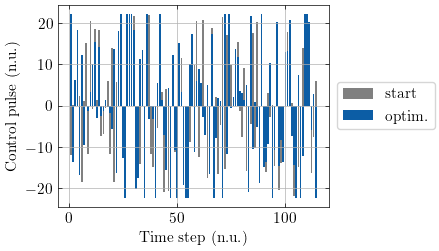

In [7]:
x1 = pd.read_csv('TNresults/controls.csv', sep='\t', header=None, names=['data'])
x2 = pd.read_csv('TNresults/jxout.csv', sep='\t', header=None, names=['data'])
x1 = array(x1['data'])
x2 = array(x2['data'])

x = np.arange(1,len(x1)+1,1)

plt.bar(x, x1, color='gray', label='start')
plt.bar(x, x2, color=colorb, label='optim.')
plt.xlabel('Time step $(\mathrm{n.u.})$')
plt.ylabel('Control pulse $(\mathrm{n.u.})$')
plt.legend(frameon=True, loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.minorticks_off()
plt.savefig('plots/TN_ctrls.pdf')
plt.show()

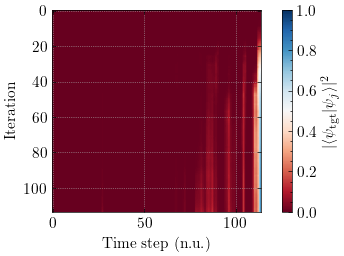

In [8]:
x1 = pd.read_csv('TNresults/jfide.csv', sep='\t', header=None)

niter = 1563
nsites = 10
figure, axis = plt.subplots(1, 1, sharex=False)

img = axis.imshow(x1.T[:114], cmap='RdBu', vmin=0, vmax=1, aspect='auto')
axis.set_xlabel('Time step ($\mathrm{n.u.}$)')
axis.set_ylabel('Iteration')
axis.minorticks_off()
cbar = figure.colorbar(img, ax=axis, pad=0.08)
cbar.set_label('$|\langle\psi_{\mathrm{tgt}}|\psi_j\\rangle|^2$')
plt.grid(True, linestyle='dotted')
plt.savefig('plots/TN_cmap.pdf')
plt.show()

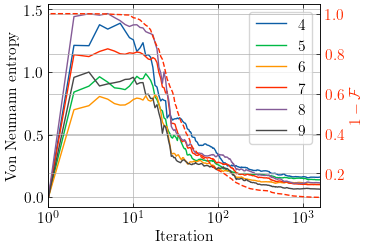

In [9]:
x2 = pd.read_csv('TNresults/jSvN.csv', sep='\t', header=None)
x2.insert(0, '0', array([0.,0.,0.,0.,0.,0.,0.,0.,0.]))

niter = 1563
nsites = 10

fig, ax1 = plt.subplots()

ax1.set_xlabel('Iteration')
ax1.set_ylabel('Von Neumann entropy')

for ii in range(3,nsites-1):
    ax1.plot(np.arange(1,niter+2,1), array(x2)[ii][:niter+1], label='{}'.format(ii+1))
ax1.set_xscale('log')
ax1.minorticks_off()
ax1.grid(True)
plt.legend(frameon=True, loc='upper right', ncol=1)

ax2 = ax1.twinx()
x2 = pd.read_csv('TNresults/jfout.csv', sep='\t', header=None)

color = 'black'
ax2.plot(2*x2, color=colorr, linestyle='dashed')
ax2.set_xlim(1,niter)
ax2.tick_params(axis='y', labelcolor=colorr)
ax2.set_ylabel('$1-\mathcal{F}$', color=colorr)
ax2.minorticks_off()
ax2.grid(True)

plt.savefig('plots/TN_VNE.pdf')
plt.show()

### Matrix exponentiation benchmarks

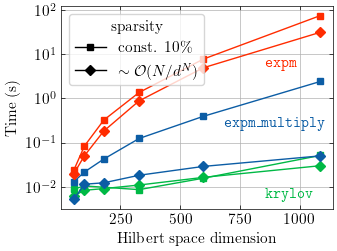

In [10]:
names = ['DH', 'krylov', 'expm_multply', 'expm']
sparse10prc = pd.read_csv('scaling/sparse10prc.dat', sep='\t', names=names)
names = ['DH', 'sparsity', 'krylov', 'expm_multply', 'expm']
sparsevar = pd.read_csv('scaling/sparsevar.dat', sep='\t', names=names)
DH = sparse10prc['DH']

plt.plot(DH, sparse10prc['krylov'], '-', color=colorg, marker='s', markersize=msize, label='const. $10\%$')
plt.plot(DH, sparse10prc['expm_multply'], '-', color=colorb, marker='s', markersize=msize)
plt.plot(DH, sparse10prc['expm'], '-', color=colorr, marker='s', markersize=msize)

plt.plot(DH, sparsevar['krylov'], '-', color=colorg, marker='D', markersize=msize, label='$\sim\mathcal{O}(N/d^N)$')
plt.plot(DH, sparsevar['expm_multply'], '-', color=colorb, marker='D', markersize=msize)
plt.plot(DH, sparsevar['expm'], '-', color=colorr, marker='D', markersize=msize)

plt.annotate('$\mathtt{expm}$', color=colorr, xy=(0.75, 0.7), xycoords='axes fraction')
plt.annotate('$\mathtt{expm\_multiply}$', color=colorb, xy=(0.6, 0.4), xycoords='axes fraction')
plt.annotate('$\mathtt{krylov}$', color=colorg, xy=(0.75, 0.05), xycoords='axes fraction')

plt.yscale('log')
plt.minorticks_off()
plt.xlabel('Hilbert space dimension')
plt.ylabel('Time $(\mathrm{s})$')
leg = plt.legend(frameon=True)
leg.set_title('sparsity')
leg.legendHandles[0].set_color('k')
leg.legendHandles[1].set_color('k')
plt.grid(True)
plt.savefig('plots/scaling_exp_10.pdf')
plt.show()

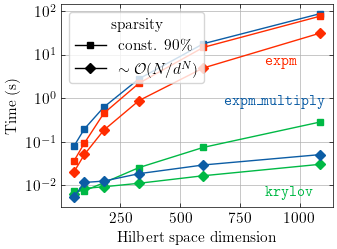

In [11]:
names = ['DH', 'krylov', 'expm_multply', 'expm']
sparse90prc = pd.read_csv('scaling/sparse90prc.dat', sep='\t', names=names)
DH = sparse90prc['DH']

plt.plot(DH, sparse90prc['krylov'], '-', color=colorg, marker='s', markersize=msize, label='const. $90\%$')
plt.plot(DH, sparse90prc['expm_multply'], '-', color=colorb, marker='s', markersize=msize)
plt.plot(DH, sparse90prc['expm'], '-', color=colorr, marker='s', markersize=msize)

plt.plot(DH, sparsevar['krylov'], '-', color=colorg, marker='D', markersize=msize, label='$\sim\mathcal{O}(N/d^N)$')
plt.plot(DH, sparsevar['expm_multply'], '-', color=colorb, marker='D', markersize=msize)
plt.plot(DH, sparsevar['expm'], '-', color=colorr, marker='D', markersize=msize)

plt.annotate('$\mathtt{expm}$', color=colorr, xy=(0.75, 0.7), xycoords='axes fraction')
plt.annotate('$\mathtt{expm\_multiply}$', color=colorb, xy=(0.6, 0.5), xycoords='axes fraction')
plt.annotate('$\mathtt{krylov}$', color=colorg, xy=(0.75, 0.05), xycoords='axes fraction')

plt.yscale('log')
plt.minorticks_off()
plt.xlabel('Hilbert space dimension')
plt.ylabel('Time $(\mathrm{s})$')
leg = plt.legend(frameon=True, loc='upper left')
leg.set_title('sparsity')
leg.legendHandles[0].set_color('k')
leg.legendHandles[1].set_color('k')
plt.grid(True)
plt.savefig('plots/scaling_exp_90.pdf')
plt.show()

The best results are reached for high Hilbert space dimension ($D_H\sim 10^3$) for Krylov's method on the 'physical' sparse format. Interestingly, for an exponentially decreasing sparsity, the time remains approximately constant over all matrix sizes. Noticeably, for $D_H<100$ feeding the matrices to the `expm_multiply` method is faster: this is due to the fact that Krylov approximations rely on repeated matrix-vector multiplications, which are not advantageous for small Hilbert space dimensions.

Also, using `expm_multiply` for low Hilbert space dimension by transforming the diagonal form of the control Hamiltonian in a sparse matrix format via `scipy.sparse.diags` has $2$ orders of magnitude of difference with respect to the standard element-wise exponentiation with `numpy.exp`.

### Scaling in the system dimension

Colors indicate the integration rules, line types are to distinguish global from local controls. Results are averaged over 10 different seeds for each case. On average, the trapezoidal rule ($\mathrm{ST}_1$) shows better results in terms of fidelity, wall time consumption and number of iterations.

In [12]:
names = ['nqubit', 'ttime_avg', 'ttime_std', 'rtime_avg', 'rtime_std', 'tniter', 'rniter', 'tf', 'rf', 'unsucc']
logs_glbctrl = pd.read_csv('scaling/glbctrl.dat', sep='\t', names=names)
logs_locctrl = pd.read_csv('scaling/locctrl.dat', sep='\t', names=names)

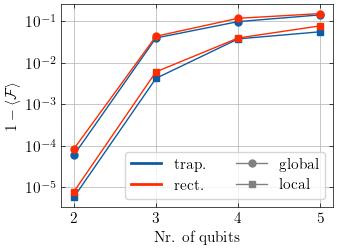

In [13]:
nqubit = logs_glbctrl['nqubit']
plt.plot(nqubit, 1-logs_glbctrl['tf'], color=colorb, marker='o', markersize=msize)
plt.plot(nqubit, 1-logs_glbctrl['rf'], color=colorr, marker='o', markersize=msize)
plt.plot(nqubit, 1-logs_locctrl['tf'], color=colorb, marker='s', markersize=msize)
plt.plot(nqubit, 1-logs_locctrl['rf'], color=colorr, marker='s', markersize=msize)

plt.xticks(nqubit)
plt.yscale('log')
plt.minorticks_off()
plt.xlabel('Nr. of qubits')
plt.ylabel('$1-\langle\mathcal{F}\\rangle$')

legend_elements = [Line2D([0], [0], color=colorb, label='trap.', linewidth=2), Line2D([0], [0], color=colorr, label='rect.', linewidth=2),
Line2D([0], [0], color='grey', marker='o', markersize=msize, label='global'), Line2D([0], [0], color='grey', marker='s', markersize=msize, label='local')]
plt.legend(ncol=2, handles=legend_elements, loc='lower right', frameon=True)
plt.grid(True)
plt.savefig('plots/localglobal_F.pdf')
plt.show()

Infidelity as a function of the number of qubits. Different controls on each transmon allows for a drop of almost an order of magnitude in infidelity. Also, the slope for local controls is less steep, i.e. the fidelity scales better with the system size.

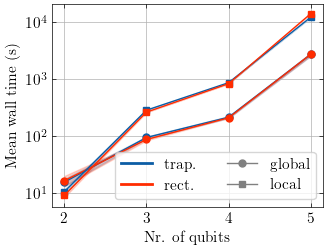

In [14]:
ttime_glb_avg, rtime_glb_avg = logs_glbctrl['ttime_avg'], logs_glbctrl['rtime_avg']
ttime_glb_std, rtime_glb_std = logs_glbctrl['ttime_std'], logs_glbctrl['rtime_std']
ttime_loc_avg, rtime_loc_avg = logs_locctrl['ttime_avg'], logs_locctrl['rtime_avg']
ttime_loc_std, rtime_loc_std = logs_locctrl['ttime_std'], logs_locctrl['rtime_std']

plt.plot(nqubit, ttime_glb_avg, color=colorb, marker='o', markersize=msize, label='global')
plt.plot(nqubit, rtime_glb_avg, color=colorr, marker='o', markersize=msize)
plt.plot(nqubit, ttime_loc_avg, color=colorb, marker='s', markersize=msize, label='local')
plt.plot(nqubit, rtime_loc_avg, color=colorr, marker='s', markersize=msize)

plt.fill_between(nqubit, ttime_glb_avg+ttime_glb_std, ttime_glb_avg-ttime_glb_std, color=colorb, alpha=0.2)
plt.fill_between(nqubit, rtime_glb_avg+rtime_glb_std, rtime_glb_avg-rtime_glb_std, color=colorr, alpha=0.2)
plt.fill_between(nqubit, ttime_loc_avg+ttime_loc_std, ttime_loc_avg-ttime_loc_std, color=colorb, alpha=0.2)
plt.fill_between(nqubit, rtime_loc_avg+rtime_loc_std, rtime_loc_avg-rtime_loc_std, color=colorr, alpha=0.2)
plt.xticks(nqubit)

plt.yscale('log')
plt.minorticks_off()
plt.xlabel('Nr. of qubits')
plt.ylabel('Mean wall time $(\mathrm{s})$')

legend_elements = [Line2D([0], [0], color=colorb, label='trap.', linewidth=2), Line2D([0], [0], color=colorr, label='rect.', linewidth=2),
Line2D([0], [0], color='grey', marker='o', markersize=msize, label='global'), Line2D([0], [0], color='grey', marker='s', markersize=msize, label='local')]
plt.legend(ncol=2, handles=legend_elements, loc='lower right', frameon=True)
plt.grid(True)
plt.savefig('plots/localglobal_mwt.pdf')
plt.show()

Wall time consumption as a function of the number of qubits. Shaded areas span one standard deviation with respect to the average. Scaling is exponential (linear in log-scale). Local controls have a steeper growth, as expected.

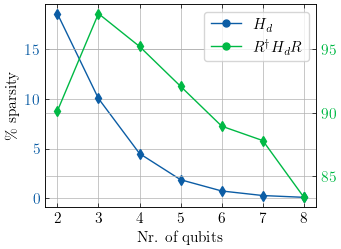

In [15]:
names = ['nqubit', 'sbr', 'sar']
rot = pd.read_csv('scaling/rot.dat', sep='\t', names=names)
nqubit = rot['nqubit']

fig, ax1 = plt.subplots()

color = colorb
ax1.set_xlabel('Nr. of qubits')
ax1.set_ylabel('$\%$ sparsity')
plt.plot(nqubit, rot['sbr'], color=color, marker='d', markersize=msize, label='$(H_d)$')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(nqubit)
ax1.minorticks_off()
ax1.grid(True)

ax2 = ax1.twinx()

color = colorg
plt.plot(nqubit, rot['sar'], color=color, marker='d', markersize=msize, label='$(R^\\dagger H_d R)$')
ax2.tick_params(axis='y', labelcolor=color)
ax2.minorticks_off()
ax2.grid(True)

legend_elements = [Line2D([0], [0], marker='o', color=colorb, label='$H_d$', markersize=msize),
Line2D([0], [0], marker='o', color=colorg, label='$R^\\dagger H_d R$', markersize=msize)]

ax2.legend(handles=legend_elements, loc='upper right', frameon=True)
plt.savefig('plots/rot.pdf')
plt.show()

In [16]:
names = ['T', 'ttime_avg', 'ttime_std', 'rtime_avg', 'rtime_std', 'tniter', 'rniter', 'tf', 'rf']
phystime2 = pd.read_csv('scaling/phystime2.dat', sep='\t', names=names)
phystime3 = pd.read_csv('scaling/phystime3.dat', sep='\t', names=names)

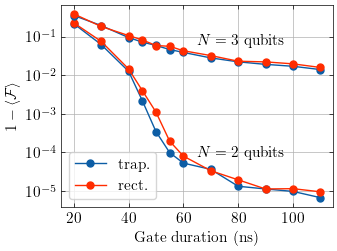

In [17]:
T = np.array(phystime2['T'])

plt.plot(T, 1-phystime2['tf'], color=colorb, marker='o', markersize=msize, label='trap.')
plt.plot(T, 1-phystime2['rf'], color=colorr, marker='o', markersize=msize, label='rect.')
plt.plot(T, 1-phystime3['tf'], color=colorb, marker='o', markersize=msize)
plt.plot(T, 1-phystime3['rf'], color=colorr, marker='o', markersize=msize)

plt.annotate('$N=2$ qubits', xy=(0.5, 0.25), xycoords='axes fraction')
plt.annotate('$N=3$ qubits', xy=(0.5, 0.8), xycoords='axes fraction')

plt.yscale('log')
plt.minorticks_off()
plt.xlabel('Gate duration $(\mathrm{ns})$') # dt=0.025
plt.ylabel('$1-\langle\mathcal{F}\\rangle$')
leg = plt.legend(loc='lower left', frameon=True)
plt.grid(True)
plt.savefig('plots/F_vs_gateduration.pdf')
plt.show()

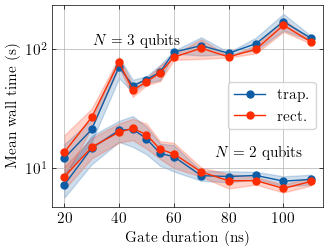

In [18]:
ttime_avg, rtime_avg = phystime2['ttime_avg'], phystime2['rtime_avg']
ttime_std, rtime_std = phystime2['ttime_std'], phystime2['rtime_std']

plt.plot(T, ttime_avg, color=colorb, marker='o', markersize=msize, label='trap.')
plt.plot(T, rtime_avg, color=colorr, marker='o', markersize=msize, label='rect.')
plt.fill_between(T, ttime_avg+ttime_std, ttime_avg-ttime_std, color=colorb, alpha=0.2)
plt.fill_between(T, rtime_avg+rtime_std, rtime_avg-rtime_std, color=colorr, alpha=0.2)

ttime_avg, rtime_avg = phystime3['ttime_avg'], phystime3['rtime_avg']
ttime_std, rtime_std = phystime3['ttime_std'], phystime3['rtime_std']

plt.plot(T, ttime_avg, color=colorb, marker='o', markersize=msize)
plt.plot(T, rtime_avg, color=colorr, marker='o', markersize=msize)
plt.fill_between(T, ttime_avg+ttime_std, ttime_avg-ttime_std, color=colorb, alpha=0.2)
plt.fill_between(T, rtime_avg+rtime_std, rtime_avg-rtime_std, color=colorr, alpha=0.2)

plt.annotate('$N=2$ qubits', xy=(0.6, 0.25), xycoords='axes fraction')
plt.annotate('$N=3$ qubits', xy=(0.15, 0.8), xycoords='axes fraction')
plt.yscale('log')
plt.xlabel('Gate duration $(\mathrm{ns})$')
plt.ylabel('Mean wall time $(\mathrm{s})$')
plt.minorticks_off()
leg = plt.legend(loc='center right', frameon=True)
plt.grid(True)
plt.savefig('plots/walltime_vs_gateduration.pdf')
plt.show()

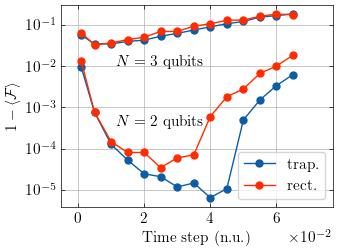

In [19]:
names = ['dt', 'ttime_avg', 'ttime_std', 'rtime_avg', 'rtime_std', 'tniter', 'rniter', 'tf', 'rf']
dt2 = pd.read_csv('scaling/dt2.dat', sep='\t', names=names)
dt3 = pd.read_csv('scaling/dt3.dat', sep='\t', names=names)

dt = dt2['dt']
plt.plot(dt, 1-dt2['tf'], color=colorb, marker='o', markersize=msize, label='trap.')
plt.plot(dt, 1-dt2['rf'], color=colorr, marker='o', markersize=msize, label='rect.')

plt.plot(dt, 1-dt3['tf'], color=colorb, marker='o', markersize=msize)
plt.plot(dt, 1-dt3['rf'], color=colorr, marker='o', markersize=msize)

plt.annotate('$N=2$ qubits', xy=(0.2, 0.4), xycoords='axes fraction')
plt.annotate('$N=3$ qubits', xy=(0.2, 0.7), xycoords='axes fraction')

plt.xlim(-0.005, 0.077)
plt.xticks(1e-3*np.array([0,20,40,60]))
plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.yscale('log')
plt.minorticks_off()
plt.xlabel('Time step $(\mathrm{n.u.})$')
plt.ylabel('$1-\langle\mathcal{F}\\rangle$')
leg = plt.legend(loc='lower right', frameon=True)
plt.grid(True)
plt.savefig('plots/F_vs_timeinterval.pdf')
plt.show()